In [1]:
import anndata as ad
import ACTIONet as anet

In [2]:
%load_ext autoreload
%autoreload 2
%aimport ACTIONet

In [3]:
adata = ad.read_h5ad("data/pfc5k_ACTIONet_v2_python.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 4505 × 17658
    obs: 'umis', 'genes', 'mito.perc', 'sizeFactors', 'Celltype', 'assigned_archetype', 'node_centrality'
    uns: 'ACTION', '__annotations___colors', 'metadata', 'obsm_annot', 'varm_annot'
    obsm: 'ACTION', 'ACTION_B', 'ACTION_normalized', 'ACTIONet2D', 'ACTIONet3D', 'ACTIONred', 'C_stacked', 'C_unified', 'H_stacked', 'H_unified', 'archetype_footprint', 'denovo_color'
    varm: 'ACTION_A', 'ACTION_V', 'unified_feature_profile', 'unified_feature_specificity'
    obsp: 'ACTIONet'

/Users/mohammadi/miniconda3/envs/actionet/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<AxesSubplot: title={'center': '__annotations__'}, xlabel='actionet2d1', ylabel='actionet2d2'>

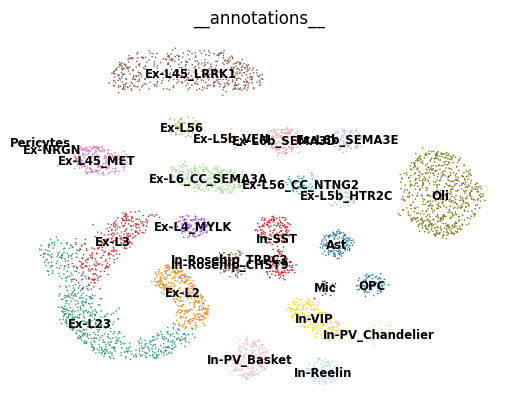

In [5]:
anet.pl.plot_ACTIONet(adata, adata.obs["Celltype"])

In [6]:
import json
import itertools

f = open('tmp/markers.json')
 
all_markers = json.load(f)

markers = all_markers["Brain"]["PFC"]["Mohammadi2020"]["marker.genes"]

In [7]:
markers.keys()

dict_keys(['Ast', 'Endo', 'Ex-L2/3', 'Ex-L4', 'Ex-L4/5', 'Ex-L5', 'Ex-L5/6', 'Ex-L5/6-CC', 'Ex-NRGN', 'In-PV (Basket)', 'In-PV (Chandelier)', 'In-Rosehip', 'In-SST', 'In-VIP', 'Mic', 'Oli', 'OPC'])

In [ ]:
import pandas as pd
import numpy as np
from scipy import sparse

network_normalization_code = 0
feature_names = pd.Series(
    [
        x.decode() if isinstance(x, (bytes, bytearray)) else x
        for x in list(adata.var.index)
    ]
)
masks = np.array(
    pd.DataFrame([feature_names.isin(markers[key]) * 1 for key in markers.keys()]).T
)
S = sparse.csc_matrix(adata.X.T)
marker_mat = sparse.csc_matrix(masks)

G = sparse.csc_matrix(adata.obsp[network_key])

algorithm = "parametric"  # For now!

In [8]:
Labels, Conf, Enrichment = anet.po.cells.annotate(adata, markers)

Error: Canceled future for execute_request message before replies were done

/Users/mohammadi/miniconda3/envs/actionet/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<AxesSubplot: title={'center': '__annotations__'}, xlabel='actionet2d1', ylabel='actionet2d2'>

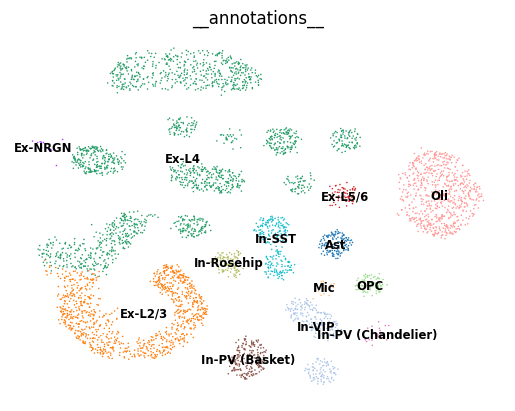

In [31]:
anet.pl.plot_ACTIONet(adata, Labels.values)

In [32]:
markers_Velmeshev = all_markers["Brain"]["PFC"]["Velmeshev2019"]["marker.genes"]

In [35]:
Labels_Velmeshev, Conf_Velmeshev, Enrichment_Velmeshev = anet.po.cells.annotate(adata, markers_Velmeshev)

Smoothing geneset scores ... done
	LPA iteration 3/3

/Users/mohammadi/miniconda3/envs/actionet/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<AxesSubplot: title={'center': '__annotations__'}, xlabel='actionet2d1', ylabel='actionet2d2'>

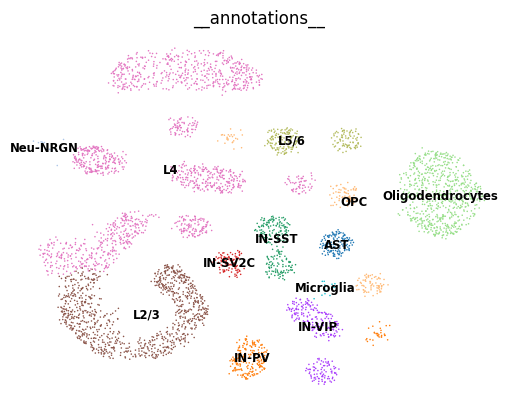

In [37]:
anet.pl.plot_ACTIONet(adata, Labels_Velmeshev.values)